# 2020 China Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf

## Things Explored in this notebook:
- initial exploration of cleaned datasets for happiness and cases in China
- different methods of visualizing happiness vs. cases data (daily, weekly, monthly, interpolated)

## Load cleaned csv's into df

In [2]:
china_hap_filter = pd.read_csv('../data/cleaned_data/2020/china_hap_cleaned.csv')
china_cov=pd.read_csv('../data/cleaned_data/2020/china_covid.csv')

## Initial investigation of cleaned subsets

In [3]:
china_hap_filter

,Unnamed: 0,date,week,mental_health_condition,age,gender,happiness_rating
0,3002,2020-04-24,week 4,No,31,Female,5
1,3003,2020-04-24,week 4,No,23,Female,8
2,3004,2020-04-24,week 4,No,27,Male,5
3,3005,2020-04-24,week 4,No,19,Female,4
4,3006,2020-04-24,week 4,No,23,Female,4
...,...,...,...,...,...,...,...
12978,15980,2020-09-25,week 16,Yes,22,Male,4
12979,15981,2020-09-25,week 16,No,30,Male,6
12980,15982,2020-09-25,week 16,No,25,Male,9
12981,15983,2020-09-25,week 16,No,31,Male,7


In [4]:
china_hap_filter.shape

(12983, 7)

### Observations

12983 rows and 7 selected columns. Since each row is a person who filled out the survey, I will need to groupby date and calculate a mean for happiness ratings.

In [5]:
# Get some information on the dataset and range
china_hap_filter['happiness_rating'].describe()

count    12983.000000
mean         5.129400
std          2.094968
min          0.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: happiness_rating, dtype: float64

<AxesSubplot:>

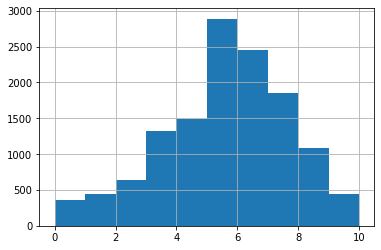

In [6]:
# Histogram to look at distribution
china_hap_filter['happiness_rating'].hist()

In [7]:
china_cov

,Unnamed: 0,Province/State,Country/Region,Lat,Long,date,cases
0,0,Anhui,China,31.8257,117.2264,2020-01-22,1
1,1,Beijing,China,40.1824,116.4142,2020-01-22,14
2,2,Chongqing,China,30.0572,107.8740,2020-01-22,6
3,3,Fujian,China,26.0789,117.9874,2020-01-22,1
4,4,Gansu,China,35.7518,104.2861,2020-01-22,0
...,...,...,...,...,...,...,...
10456,10456,Tianjin,China,39.3054,117.3230,2020-12-03,300
10457,10457,Tibet,China,31.6927,88.0924,2020-12-03,1
10458,10458,Xinjiang,China,41.1129,85.2401,2020-12-03,980
10459,10459,Yunnan,China,24.9740,101.4870,2020-12-03,219


In [8]:
china_cov.shape

(10461, 7)

In [9]:
china_cov['cases'].describe()

count    10461.000000
mean      2467.148743
std      11164.603009
min          0.000000
25%        147.000000
50%        328.000000
75%        935.000000
max      68149.000000
Name: cases, dtype: float64

In [10]:
china_cov = china_cov[['date','cases']]
china_cov

,date,cases
0,2020-01-22,1
1,2020-01-22,14
2,2020-01-22,6
3,2020-01-22,1
4,2020-01-22,0
...,...,...
10456,2020-12-03,300
10457,2020-12-03,1
10458,2020-12-03,980
10459,2020-12-03,219


### Observations

Dataset is particularly thorough and breaks down # of cases on each day in different provinces and regions in China. 

### Group COVID-19 cases by date

Look at how COVID-19 has played out in China.. which should be interesting since this is where it all started

In [11]:
china_cov['date'] = pd.to_datetime(china_cov['date'])

In [12]:
china_date_cov= china_cov.groupby('date').sum()
china_date_cov

,cases
date,
2020-01-22,548
2020-01-23,643
2020-01-24,920
2020-01-25,1406
2020-01-26,2075
...,...
2020-11-29,92814
2020-11-30,92902
2020-12-01,92993


Text(0, 0.5, 'Cases')

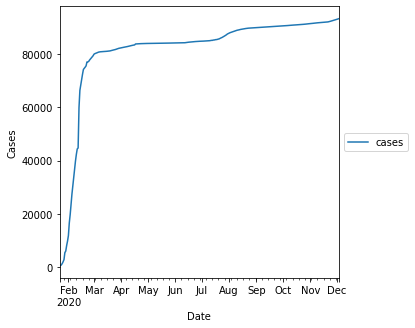

In [13]:
china_date_cov.plot(kind='line',figsize=(5,5))
plt.legend(loc= 'center left', bbox_to_anchor=(1.0,0.5))
plt.xlabel('Date')
plt.ylabel('Cases')

### Observations
Plateau in the # of cases after around April. Huge surge in the beginning (not surprising).

### Calculating daily changes in COVID-19 cases count

In [14]:
china_date_cov['daily_change'] = china_date_cov['cases'].diff()
china_date_cov

,cases,daily_change
date,,
2020-01-22,548,NaN
2020-01-23,643,95.0
2020-01-24,920,277.0
2020-01-25,1406,486.0
2020-01-26,2075,669.0
...,...,...
2020-11-29,92814,133.0
2020-11-30,92902,88.0
2020-12-01,92993,91.0


<AxesSubplot:xlabel='date'>

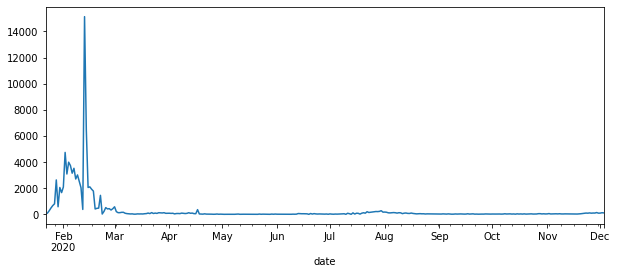

In [15]:
# plot of daily change in cases
china_date_cov['daily_change'].plot(figsize=(10,4))

### Observations

Daily change plot makes more sense in terms of being able to understand periods where COVID-19 was getting worse. Clearly see the spike in February to March and it levels off by April. No cases after that except a small blip in August.

#### Exported to clean csv

In [16]:
china_date_cov.to_csv('../data/exported_subset_data/covid/covid_china.csv')

### Group happiness ratings by date

In [17]:
china_df=china_hap_filter.groupby('date')['happiness_rating'].mean().reset_index()

In [18]:
china_df

,date,happiness_rating
0,2020-01-05,5.240418
1,2020-01-06,6.000000
2,2020-02-05,4.944681
3,2020-02-06,7.000000
4,2020-02-09,5.341935
...,...,...
80,2020-11-07,4.931034
81,2020-11-08,6.545455
82,2020-12-06,5.666667
83,2020-12-07,5.179487


### Create new column with just month and year for date

In [19]:
china_df['month_year'] = pd.to_datetime(china_df['date']).dt.to_period('M')

In [20]:
china_df['date'] = pd.to_datetime(china_df['date'])

In [21]:
china_df

,date,happiness_rating,month_year
0,2020-01-05,5.240418,2020-01
1,2020-01-06,6.000000,2020-01
2,2020-02-05,4.944681,2020-02
3,2020-02-06,7.000000,2020-02
4,2020-02-09,5.341935,2020-02
...,...,...,...
80,2020-11-07,4.931034,2020-11
81,2020-11-08,6.545455,2020-11
82,2020-12-06,5.666667,2020-12
83,2020-12-07,5.179487,2020-12


## Happiness rating grouped by days vs. COVID-19 daily case changes

In [22]:
china_df.groupby('month_year')['happiness_rating'].mean()

month_year
2020-01    5.620209
2020-02    5.762205
2020-03    5.305765
2020-04    4.812659
2020-05    4.710094
2020-06    4.894552
2020-07    4.717583
2020-08    5.250616
2020-09    5.014051
2020-10    4.804222
2020-11    5.375879
2020-12    4.948718
Freq: M, Name: happiness_rating, dtype: float64

### Merge happiness and COVID-19 cases into one df

In [23]:
merged_df= pd.merge(left=china_df, left_on='date',
         right=china_date_cov, right_on='date')
merged_df

,date,happiness_rating,month_year,cases,daily_change
0,2020-02-05,4.944681,2020-02,27440,3733.0
1,2020-02-06,7.000000,2020-02,30587,3147.0
2,2020-02-09,5.341935,2020-02,39829,3015.0
3,2020-03-05,5.276596,2020-03,80537,151.0
4,2020-03-06,5.405405,2020-03,80690,153.0
...,...,...,...,...,...
75,2020-10-08,5.431373,2020-10,90728,41.0
76,2020-11-05,5.000000,2020-11,91552,43.0
77,2020-11-06,5.027027,2020-11,91591,39.0
78,2020-11-07,4.931034,2020-11,91622,31.0


<AxesSubplot:xlabel='date'>

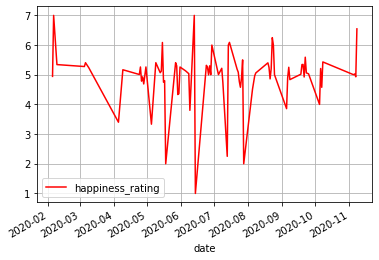

In [24]:
merged_df.plot(x='date', y='happiness_rating', color='red',grid=True)

### Observations
Spiky daily happiness rating plot. Try to plot monthly means instead given limitations of dataset.

In [25]:
merged_df['month_year'] = pd.to_datetime(merged_df['date']).dt.to_period('M')

### Monthly COVID-19 cases plotted with monthly happiness rating means

<AxesSubplot:label='8594e7ac-e5a9-4b00-b7c6-1d5054f4b3dc'>

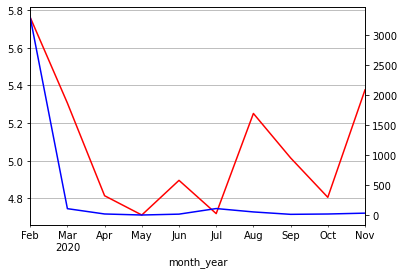

In [26]:
month_hap=merged_df.groupby('month_year')['happiness_rating'].mean()
month_hap.plot(color='red',grid=True)
month_cov=merged_df.groupby('month_year')['daily_change'].mean()
month_cov.plot(color='blue', grid=True, secondary_y=True)

### Observations

Happiness seems to decline gradually between Feb to May but only by 1 point on the Cantril ladder. Some fluctuations, but I think the monthly plot is a little too simplified.

### Weekly COVID-19 

In [27]:
weekly_covid= china_date_cov.rolling(7).mean()

<AxesSubplot:label='4637e190-93b3-49c3-a522-943804193a4f'>

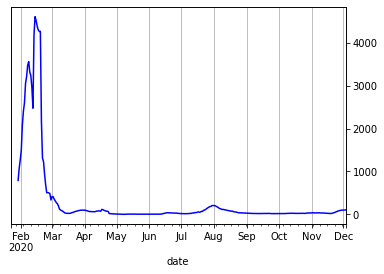

In [37]:
weekly_covid['daily_change'].plot(color='blue', grid=True, secondary_y=True)

## Interpolated Happiness Ratings

In [29]:
china_df_daily=china_df.set_index(pd.to_datetime(china_df['date']))

In [30]:
china_df_daily=china_df_daily[['date', 'happiness_rating']]

In [31]:
china_df_daily

,date,happiness_rating
date,,
2020-01-05,2020-01-05,5.240418
2020-01-06,2020-01-06,6.000000
2020-02-05,2020-02-05,4.944681
2020-02-06,2020-02-06,7.000000
2020-02-09,2020-02-09,5.341935
...,...,...
2020-11-07,2020-11-07,4.931034
2020-11-08,2020-11-08,6.545455
2020-12-06,2020-12-06,5.666667


<AxesSubplot:xlabel='date'>

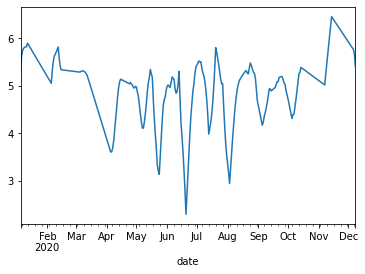

In [32]:
### resample and interpolate; calcualte weekly rolling mean
china_df_daily.resample('D').interpolate().rolling('7D')['happiness_rating'].mean().plot()

In [33]:
china_df_daily.to_csv('../data/exported_subset_data/happiness_2020/interpolated_china.csv')

<AxesSubplot:label='9f4ab989-1b13-42b6-bfed-27161c63c5b1'>

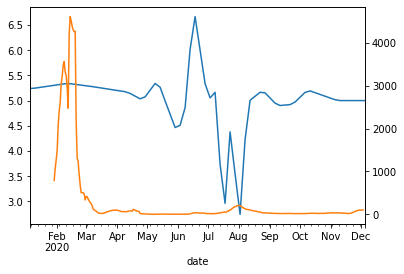

In [34]:
## rolling weekly interpolated means for happiness vs. weekly COVID-19 cases
china_df_daily.resample('5D').interpolate().rolling('10D')['happiness_rating'].mean().plot()
weekly_covid['daily_change'].plot(secondary_y=True)

### Observations

COVID-19 started in China, hence the huge spike in Feb-March. There's a huge dip in happiness in August where there was also a slight blip increase in cases, but other than that, happiness ratings have been remarkably constant throughout 2020.

## Happiness rating mean for 2020 as a whole in China

In [35]:
china_hap_filter['happiness_rating'].mean()

5.12939998459524

China's happiness rating in 2019 was 5.14. Essentially no change in happiness ratings (decreased by 0.01). Very interesting and not sure how to feel about that fact that there was basically no change.